In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_json("data/alert_data.json")
df

,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,FORTINET-FORTIGATE-MIB::fgTrapWcApDown (1.3.6....,Ok,2,P3,60,Network,Wireless,Device Status,AP Down,True
1,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,60,Network,Firewall,Device Status,Device Down,True
2,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,180,Compute,Virtualization,Device Status,Device Down,True
3,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
4,Critical - Packet Loss=100% - 100 (>= 100),Ok,2,P0,59,Compute,Operating System,Device Status,Device Down,True
...,...,...,...,...,...,...,...,...,...,...
9995,SNMP request timeout on WC008_01.mpdnet.miami-...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9996,Multiple alerts on resource WC008_01.mpdnet.mi...,Ok,2,P1,240,Network,Switch,Connectivity,Monitoring Failure,True
9997,OpsRamp agent is offline,Ok,2,P0,1140,Compute,Operating System,Connectivity,Opsramp Cloud Connectivity,False
9998,[Cleared] cca02ris001.cc.nwncloud.com: cca02ri...,Ok,2,P0,58,Others,Others,Others,Others,True


In [3]:
df.columns

Index(['subject', 'currentState', 'repeatCount', 'priority', 'healTime',
       'alertClass', 'alertSubClass', 'alertCategory', 'alertSubCategory',
       'alert_autoheal'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   subject           10000 non-null  object
 1   currentState      10000 non-null  object
 2   repeatCount       10000 non-null  int64 
 3   priority          10000 non-null  object
 4   healTime          10000 non-null  int64 
 5   alertClass        10000 non-null  object
 6   alertSubClass     10000 non-null  object
 7   alertCategory     10000 non-null  object
 8   alertSubCategory  10000 non-null  object
 9   alert_autoheal    10000 non-null  bool  
dtypes: bool(1), int64(2), object(7)
memory usage: 713.0+ KB


In [5]:
df.describe()

,repeatCount,healTime
count,10000.000000,10000.000000
mean,2.137800,1705.875400
std,0.535014,5683.926477
min,2.000000,1.000000
25%,2.000000,240.000000
50%,2.000000,540.000000
75%,2.000000,900.000000
max,10.000000,76320.000000


In [6]:
df.isnull().sum()

subject             0
currentState        0
repeatCount         0
priority            0
healTime            0
alertClass          0
alertSubClass       0
alertCategory       0
alertSubCategory    0
alert_autoheal      0
dtype: int64

In [7]:
df["currentState"].value_counts()

Ok    10000
Name: currentState, dtype: int64

In [8]:
dd = df["repeatCount"].value_counts()
dd

2     9100
3      620
4      177
5       44
6       43
8        9
10       3
7        3
9        1
Name: repeatCount, dtype: int64

In [9]:
df["priority"].value_counts()

P1    5052
P2    2793
P0    1460
P3     695
Name: priority, dtype: int64

<AxesSubplot:xlabel='priority', ylabel='count'>

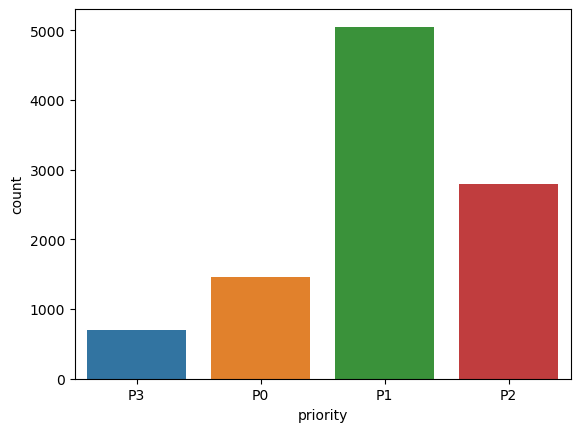

In [10]:
sns.countplot(x=df["priority"])

In [11]:
df["healTime"].value_counts()

540      1365
240      1110
300       998
900       722
60        607
         ... 
20820       1
4620        1
34140       1
7020        1
8280        1
Name: healTime, Length: 328, dtype: int64

<AxesSubplot:ylabel='Density'>

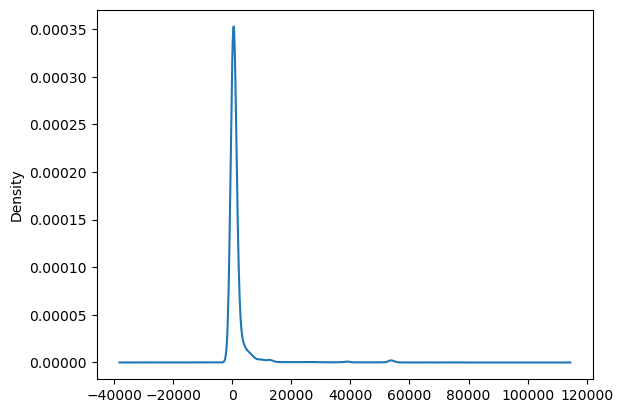

In [12]:
# plot distribution of values in Marks column
df["healTime"].plot(kind='kde')

/tmp/ipykernel_398637/3356269219.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['healTime'])


<AxesSubplot:xlabel='healTime', ylabel='Density'>

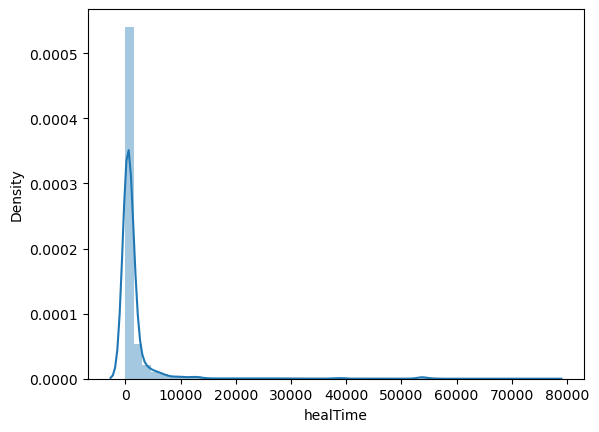

In [13]:
sns.distplot(df['healTime'])

In [14]:
df["alertClass"].value_counts()

Network          4170
Others           2467
Compute          1660
Application      1217
Environment       135
Data              118
Tools             107
Communication      64
Cloud              62
Name: alertClass, dtype: int64

<AxesSubplot:xlabel='count', ylabel='alertClass'>

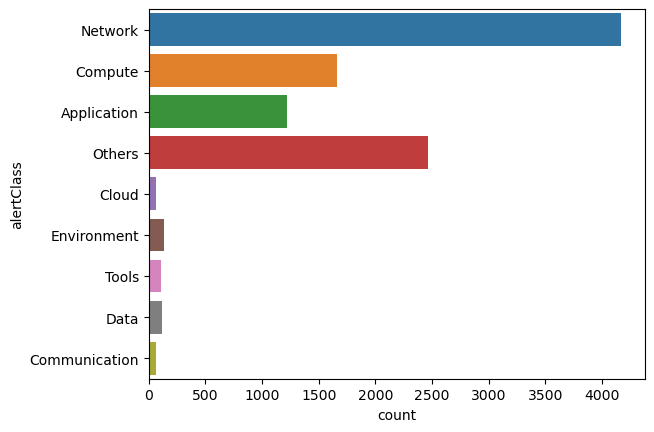

In [15]:
sns.countplot(data=df, y=df["alertClass"])

In [16]:
df["alertSubClass"].value_counts()

Switch                     2594
Others                     2467
Operating System           1247
Wireless                    855
Third Party Application     618
Web Service                 544
Firewall                    410
Virtualization              404
Router                      252
Power                       135
Monitoring                  132
Infra Application            90
Backup                       63
Voice                        61
Generic Device               41
Database                     35
Storage                      20
SDWAN                        14
Hardware                     11
Cloud Instance                4
Collaboration                 3
Name: alertSubClass, dtype: int64

<AxesSubplot:xlabel='Count', ylabel='alertSubClass'>

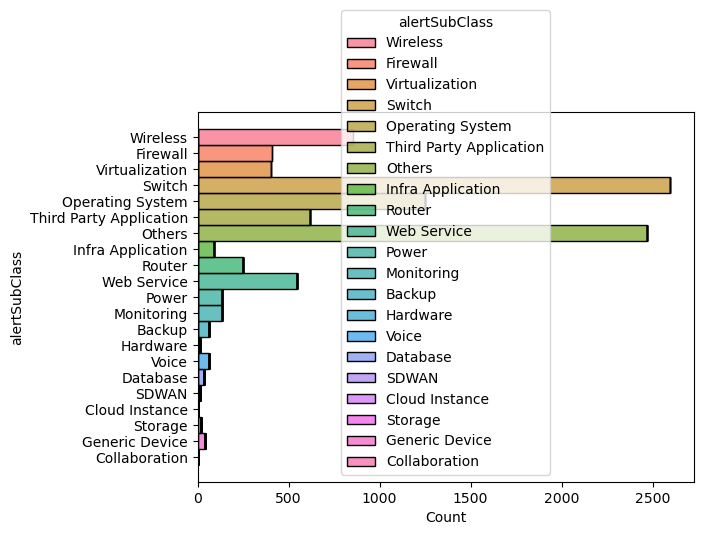

In [17]:
sns.histplot(data=df, y="alertSubClass", hue="alertSubClass", multiple="stack")

In [18]:
df["alertCategory"].value_counts()

Others                2467
Connectivity          2326
Device Status         2064
Device Health         1230
Application Health    1074
Network Interface      407
Application Status     398
Device Management       31
VOIP Link                2
Resource Status          1
Name: alertCategory, dtype: int64

<AxesSubplot:xlabel='alertCategory', ylabel='Count'>

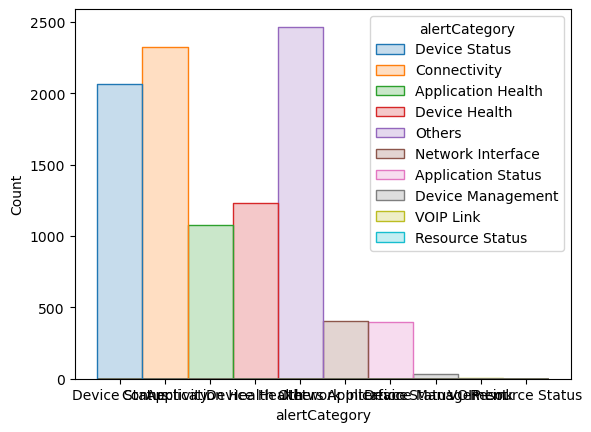

In [19]:
sns.histplot(df, x="alertCategory", hue="alertCategory", element="step")

In [20]:
df["alertSubCategory"].value_counts()

Others                             2467
Monitoring Failure                 1902
Device Down                         952
AP Down                             716
Third Party Application Service     618
                                   ... 
Management Connectivity               1
Resource Down                         1
High Availability                     1
Storagecraft Service Stopped          1
Opsramp Gateway Status                1
Name: alertSubCategory, Length: 69, dtype: int64

In [21]:
print(df["alert_autoheal"].shape)
df["alert_autoheal"].value_counts() # here we got to know we have class imbalance

(10000,)


True     8746
False    1254
Name: alert_autoheal, dtype: int64

### check whether we have duplicate or not

In [22]:
duplicats = df[df.duplicated()]
duplicats.shape

(4762, 10)

In [23]:
df.drop_duplicates(inplace=True)
df.shape

(5238, 10)

### LabelEncoding

In [24]:
from sklearn.preprocessing import LabelEncoder
enc = LabelEncoder()
df.loc[:,['subject','priority','alertClass','alertSubClass', 'alertCategory', 'alertSubCategory','alert_autoheal']] = \
df.loc[:,['subject','priority','alertClass','alertSubClass', 'alertCategory', 'alertSubCategory','alert_autoheal']].apply(enc.fit_transform)
df.head()

/tmp/ipykernel_398637/2925873602.py:3: FutureWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.loc[:,['subject','priority','alertClass','alertSubClass', 'alertCategory', 'alertSubCategory','alert_autoheal']] = \


,subject,currentState,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836,Ok,2,3,60,6,20,5,2,1
1,376,Ok,2,0,60,6,4,5,18,1
2,376,Ok,2,0,180,3,17,5,18,1
3,1987,Ok,2,1,240,6,15,2,38,1
4,376,Ok,2,0,59,3,9,5,18,1


In [25]:
df.shape

(5238, 10)

## spliting the data in target and independent column

In [26]:
X = df.drop(["currentState", "alert_autoheal"],axis=1)
y = df.alert_autoheal
X.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
0,836,2,3,60,6,20,5,2
1,376,2,0,60,6,4,5,18
2,376,2,0,180,3,17,5,18
3,1987,2,1,240,6,15,2,38
4,376,2,0,59,3,9,5,18


In [27]:
# checking whether Label Encoder worker properly or not
X["alertClass"].value_counts()

6    1671
7    1575
3     962
0     657
5     109
4     105
1      54
2      53
8      52
Name: alertClass, dtype: int64

In [28]:
X["priority"].value_counts()

1    2323
2    1627
0     962
3     326
Name: priority, dtype: int64

### Spliting the data in ```Train and test```

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train,y_test = \
train_test_split(X,y,test_size=0.3,random_state=142)

In [30]:
len(X_train), len(X_test)

(3666, 1572)

In [31]:
y_train.tail(2)

8703    1
464     1
Name: alert_autoheal, dtype: int64

In [32]:
len(y_train), len(y_test)

(3666, 1572)

### checking the model accuracy with imbalance classes

In [33]:
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X_train,y_train)
y_predict = model.predict(X_test)

In [34]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))
pd.crosstab(y_test,y_predict)

0.9586513994910941


col_0,0,1
alert_autoheal,,
0,311,37
1,28,1196


# Data Imbalance correction

In [35]:
#pip install imblearn

In [36]:
from collections import Counter
from imblearn.over_sampling import SMOTE
smote = SMOTE()

In [37]:
X_smote, y_smote = smote.fit_resample(X.astype('float'),y) # without floating value accuracy will decrease

In [38]:
y_smote.value_counts()

1    4113
0    4113
Name: alert_autoheal, dtype: int64

In [39]:
print("Before SMOTE :" , Counter(y))
print("After SMOTE :" , Counter(y_smote))

Before SMOTE : Counter({1: 4113, 0: 1125})
After SMOTE : Counter({1: 4113, 0: 4113})


In [40]:
X_smote.columns

Index(['subject', 'repeatCount', 'priority', 'healTime', 'alertClass',
       'alertSubClass', 'alertCategory', 'alertSubCategory'],
      dtype='object')

### check duplicates after balancing 

In [41]:
smote_dup = X_smote[X_smote.duplicated()]
smote_dup.shape

(0, 8)

### Spliting data after balance it

In [42]:
from sklearn.model_selection import train_test_split
X_train_smote,X_test_smote, y_train_smote,y_test_smote = \
train_test_split(X_smote,y_smote,test_size=0.3,random_state=142)

In [43]:
X_train_smote.columns

Index(['subject', 'repeatCount', 'priority', 'healTime', 'alertClass',
       'alertSubClass', 'alertCategory', 'alertSubCategory'],
      dtype='object')

In [44]:
len(X_train_smote["healTime"]) # I'm checking here whether it has increased healTime's values or not

5758

In [45]:
len(X_train_smote), len(X_test_smote)

(5758, 2468)

In [46]:
len(y_train_smote),len(y_test_smote)

(5758, 2468)

In [47]:
model.fit(X_train_smote,y_train_smote)
y_predict = model.predict(X_test_smote)
print(accuracy_score(y_test_smote,y_predict))
pd.crosstab(y_test_smote,y_predict) # Compute a simple cross tabulation of two (or more) factors.

0.9696110210696921


col_0,0,1
alert_autoheal,,
0,1206,32
1,43,1187


## Using classification model for getting ```Auto Heal```

In [48]:
from sklearn.svm import LinearSVC,SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

In [49]:
import pickle
from sklearn.model_selection import cross_validate
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score, classification_report

rbf = radial basis function kernel

In [50]:
models=[LogisticRegression(),
        LinearSVC(),
        SVC(kernel='rbf'),
        KNeighborsClassifier(),
        RandomForestClassifier(),
        DecisionTreeClassifier(),
        GradientBoostingClassifier(),
        GaussianNB()]

In [51]:
model_names=['LogisticRegression',
             'LinearSVM',
             'rbfSVM',
             'KNearestNeighbors',
             'RandomForestClassifier',
             'DecisionTree',
             'GradientBoostingClassifier',
             'GaussianNB']

acc =[]
Precision = []
Recall = []
F1 = []
report = []
val_ac = {}

for model in range(len(models)):
    classification_model=models[model]
    classification_model.fit(X_train_smote,y_train_smote)
    pred=classification_model.predict(X_test_smote)
    acc.append(accuracy_score(pred,y_test_smote))
    Precision.append(precision_score(pred, y_test_smote))
    Recall.append(recall_score(pred, y_test_smote))
    F1.append(f1_score(pred, y_test_smote))
    report.append(classification_report(pred, y_test_smote))
    
    
     
val_acc={'Modelling Algorithm':model_names,'Accuracy':acc, "Precision":Precision, "Recall":Recall, "F1":F1}
val_acc

/home/sangramdh/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/sangramdh/.local/lib/python3.10/site-packages/sklearn/svm/_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


{'Modelling Algorithm': ['LogisticRegression',
  'LinearSVM',
  'rbfSVM',
  'KNearestNeighbors',
  'RandomForestClassifier',
  'DecisionTree',
  'GradientBoostingClassifier',
  'GaussianNB'],
 'Accuracy': [0.9740680713128039,
  0.9145056726094003,
  0.9238249594813615,
  0.9696110210696921,
  0.9991896272285251,
  0.9995948136142626,
  0.9995948136142626,
  0.9128849270664505],
 'Precision': [0.973170731707317,
  0.9715447154471545,
  0.9422764227642276,
  0.9650406504065041,
  1.0,
  1.0,
  1.0,
  0.9658536585365853],
 'Recall': [0.9747557003257329,
  0.8716265499635303,
  0.908307210031348,
  0.9737489745693191,
  0.9983766233766234,
  0.9991876523151909,
  0.9991876523151909,
  0.8728875826598089],
 'F1': [0.9739625711960943,
  0.918877354863514,
  0.9249800478850758,
  0.9693752552062066,
  0.9991876523151909,
  0.9995936611133686,
  0.9995936611133686,
  0.9170204554226168]}

In [52]:
acc_table=pd.DataFrame(val_acc)
acc_table = acc_table.sort_values(by='Accuracy', ascending=[False])
acc_table

,Modelling Algorithm,Accuracy,Precision,Recall,F1
5,DecisionTree,0.999595,1.000000,0.999188,0.999594
6,GradientBoostingClassifier,0.999595,1.000000,0.999188,0.999594
4,RandomForestClassifier,0.999190,1.000000,0.998377,0.999188
0,LogisticRegression,0.974068,0.973171,0.974756,0.973963
3,KNearestNeighbors,0.969611,0.965041,0.973749,0.969375
2,rbfSVM,0.923825,0.942276,0.908307,0.924980
1,LinearSVM,0.914506,0.971545,0.871627,0.918877
7,GaussianNB,0.912885,0.965854,0.872888,0.917020


#### Accuracy comparession

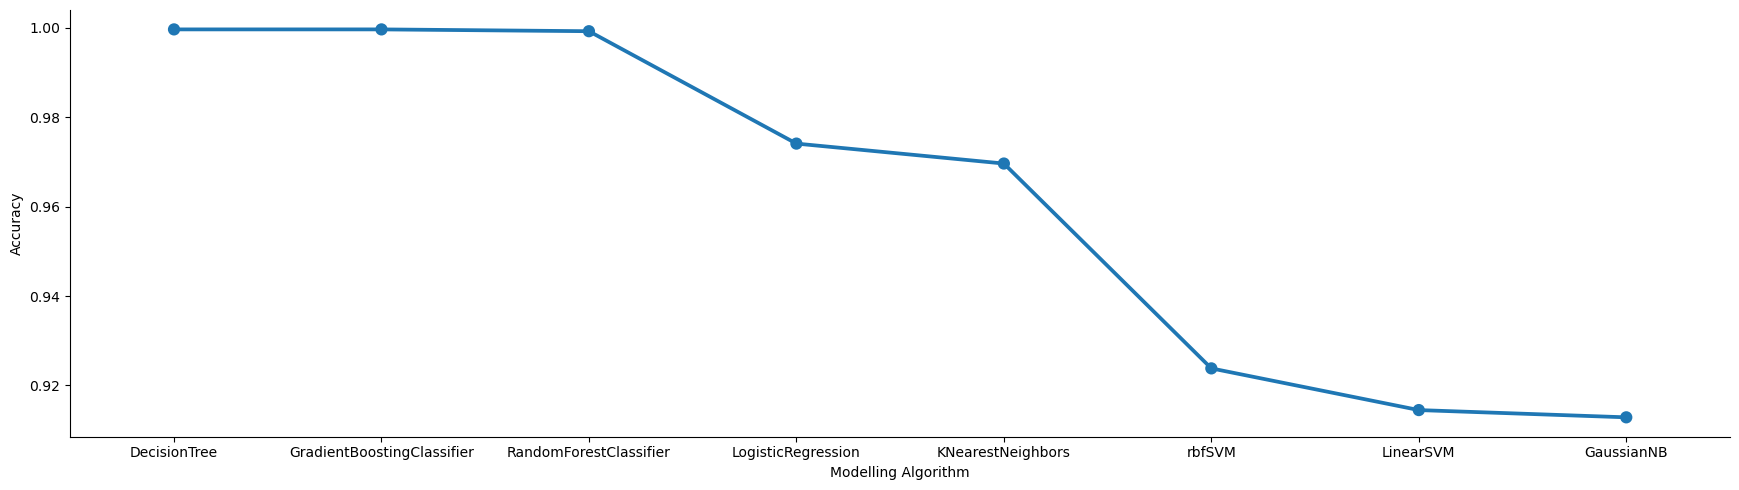

In [53]:
sns.catplot(x='Modelling Algorithm',y='Accuracy',data=acc_table,kind='point',aspect=3.5)

<AxesSubplot:xlabel='Accuracy', ylabel='Modelling Algorithm'>

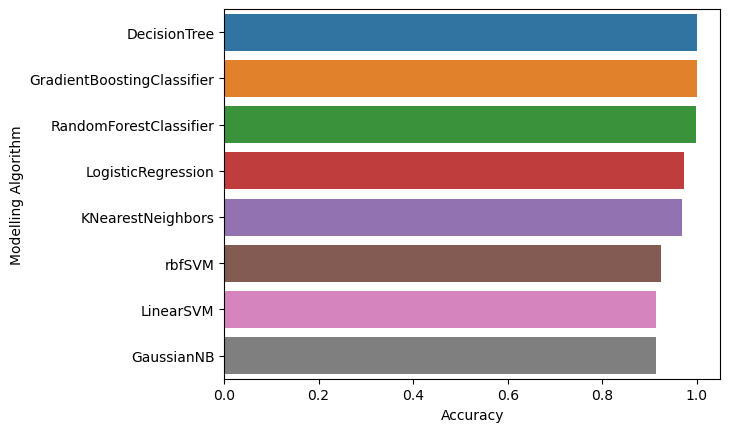

In [54]:
sns.barplot(y='Modelling Algorithm',x='Accuracy',data=acc_table)

#### Precision comparession

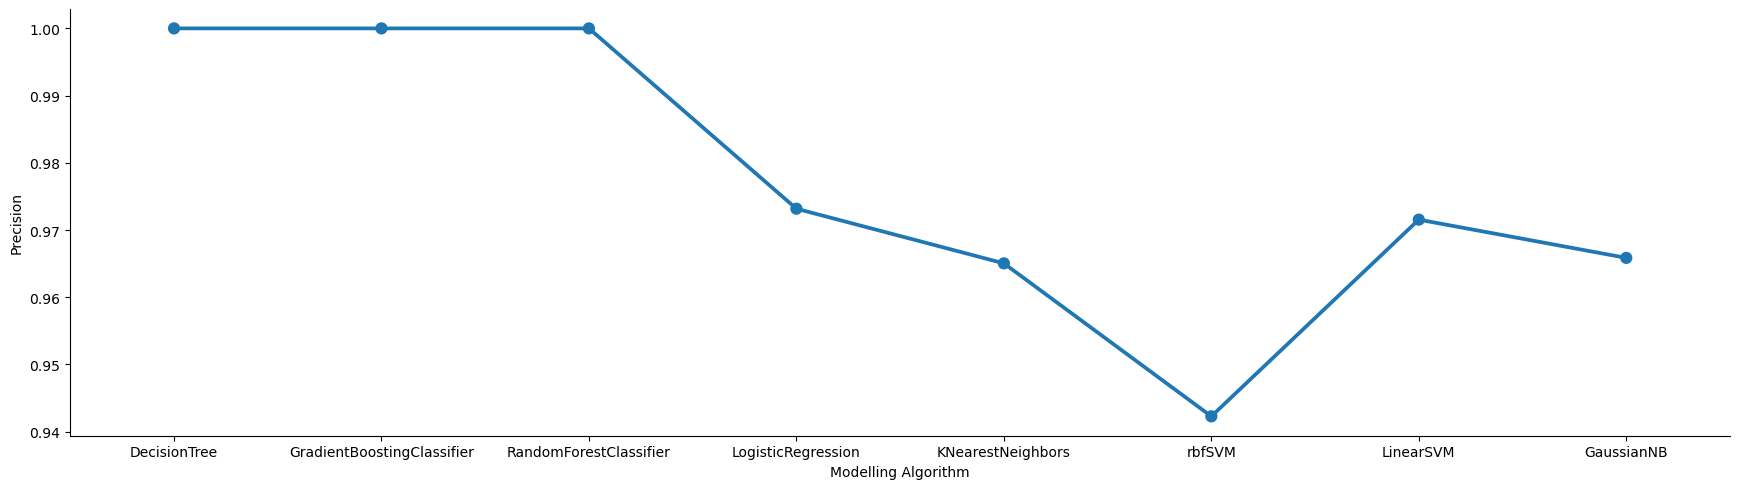

In [55]:
sns.catplot(x='Modelling Algorithm',y='Precision',data=acc_table,kind='point',aspect=3.5)

#### Recall comparision

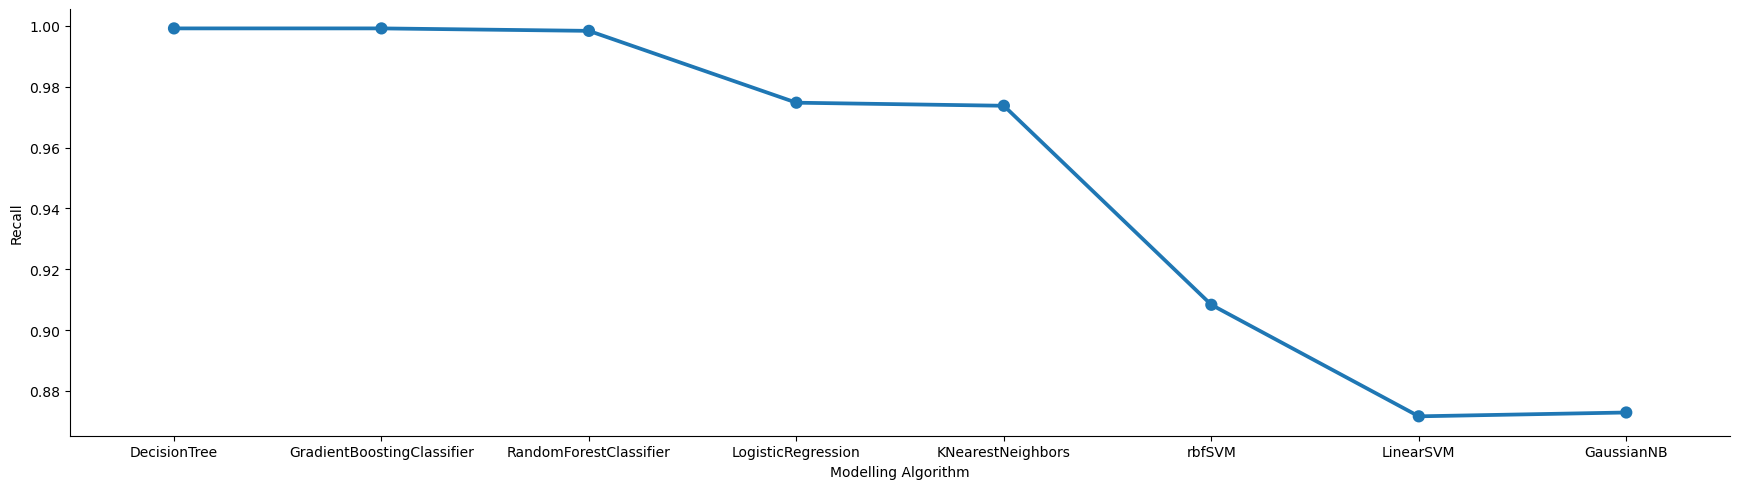

In [56]:
sns.catplot(x='Modelling Algorithm',y='Recall',data=acc_table,kind='point',aspect=3.5)

#### F1 comparession

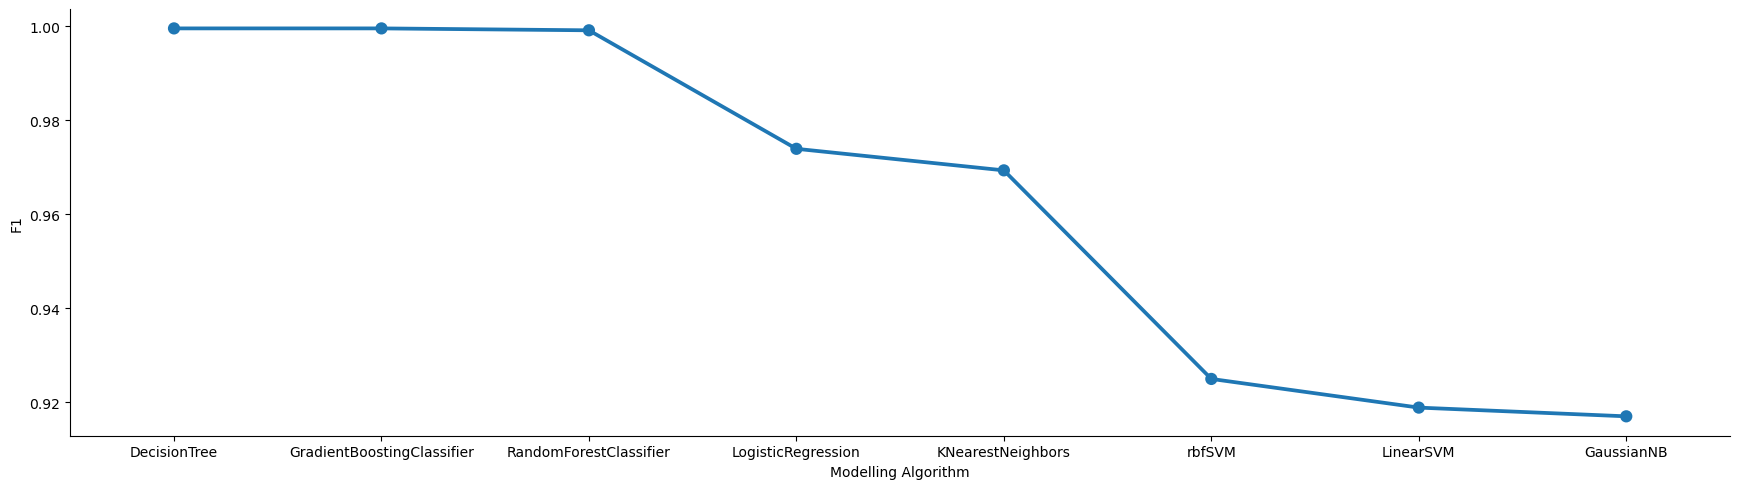

In [57]:
sns.catplot(x='Modelling Algorithm',y='F1',data=acc_table,kind='point',aspect=3.5)

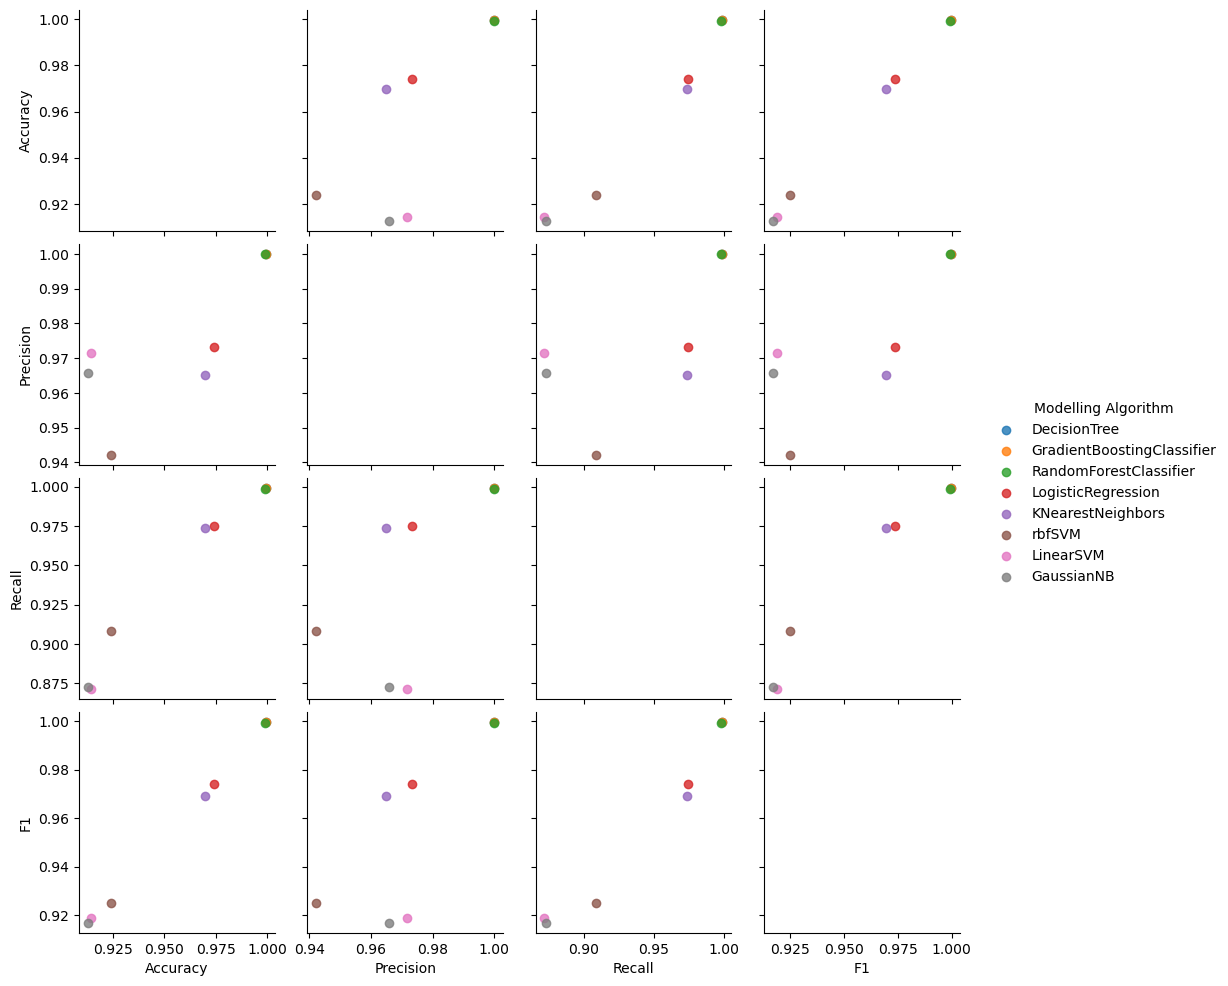

In [58]:
sns.pairplot(data=acc_table, hue='Modelling Algorithm', kind='reg') #'scatter', 'kde', 'hist', 'reg'

In [59]:
for i in report:
    print(i)

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      1240
           1       0.97      0.97      0.97      1228

    accuracy                           0.97      2468
   macro avg       0.97      0.97      0.97      2468
weighted avg       0.97      0.97      0.97      2468

              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1097
           1       0.97      0.87      0.92      1371

    accuracy                           0.91      2468
   macro avg       0.91      0.92      0.91      2468
weighted avg       0.92      0.91      0.91      2468

              precision    recall  f1-score   support

           0       0.91      0.94      0.92      1192
           1       0.94      0.91      0.92      1276

    accuracy                           0.92      2468
   macro avg       0.92      0.92      0.92      2468
weighted avg       0.92      0.92      0.92      2468

              preci

In [60]:
# import pickle
# saved_model = pickle.dumps(knn)
# knn_from_pickle = pickle.loads(saved_model)
# knn_from_pickle.predict(X_test_smote)

Assumptions for regression:

1. Error has zero mean
2. Error has constant variance
3. Errors are uncorrelated
4. Errors are normally distributed

### checking outlier on ```healTime``` column

In [61]:
X_smote["healTime"].tail(3)

8223    12600.000000
8224     2361.668678
8225     2018.438148
Name: healTime, dtype: float64

<AxesSubplot:xlabel='healTime'>

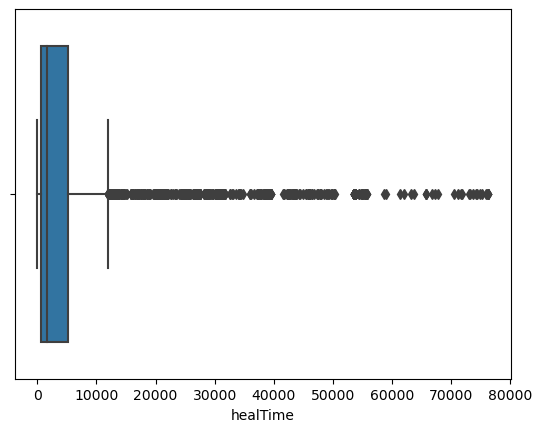

In [62]:
# Box plot
sns.boxplot(x=X_smote["healTime"])

<AxesSubplot:xlabel='healTime'>

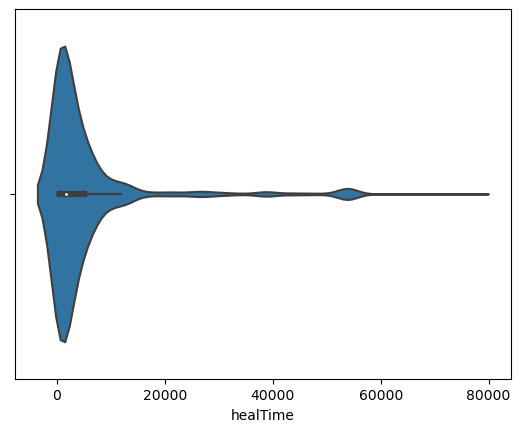

In [63]:
# Violinplot
sns.violinplot(x=X_smote["healTime"])

In [64]:
# descriptive statistics of healTime
a = df["healTime"].describe()
b = X_smote["healTime"].describe()
print(a,'\n', b)

count     5238.000000
mean      2738.024628
std       7543.267620
min          1.000000
25%        300.000000
50%        840.000000
75%       1785.000000
max      76320.000000
Name: healTime, dtype: float64 
 count     8226.000000
mean      5520.415216
std      10972.775032
min          1.000000
25%        540.000000
50%       1680.000000
75%       5100.000000
max      76320.000000
Name: healTime, dtype: float64


In [65]:
# Checking frequency of subcatagory under
c = df["healTime"].value_counts()
d = X_smote["healTime"].value_counts()
print(c, "\n", d)

900      542
300      431
240      346
840      321
60       276
        ... 
10320      1
36600      1
39         1
39420      1
8280       1
Name: healTime, Length: 328, dtype: int64 
 900.000000      542
300.000000      431
240.000000      346
840.000000      321
60.000000       276
               ... 
14549.088179      1
1139.903316       1
4817.804844       1
10978.264302      1
2018.438148       1
Name: healTime, Length: 2105, dtype: int64


In [66]:
# Checking lessthan 1
e = (df["healTime"]<= 1).value_counts()
f = (X_smote["healTime"]<= 1).value_counts()
print(e,"\n", f)

False    5233
True        5
Name: healTime, dtype: int64 
 False    8221
True        5
Name: healTime, dtype: int64


In [67]:
# Checking Greaterthan 60000
g = (df["healTime"]<= 60000).value_counts()
h = (X_smote["healTime"]<= 60000).value_counts()
print(g, "\n", h)

True     5231
False       7
Name: healTime, dtype: int64 
 True     8198
False      28
Name: healTime, dtype: int64


## Feature Selection

/tmp/ipykernel_398637/54153052.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True) # 'pearson', 'kendall', 'spearman'


<AxesSubplot:>

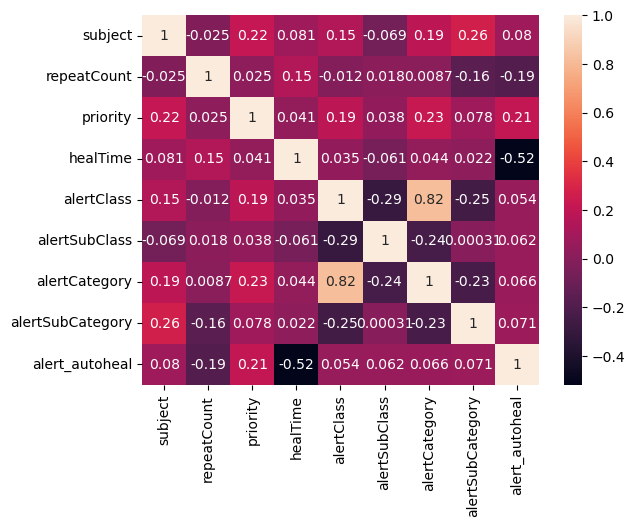

In [68]:
sns.heatmap(df.corr(), annot=True) # 'pearson', 'kendall', 'spearman'

In [69]:
from scipy.stats import pearsonr

def get_correlation(column1, column2, X_smote):
    pearson_corr, p_value = pearsonr(X_smote[column1], X_smote[column2])
    print(f"Correlation b/w {column1} and {column2} is {pearson_corr}")
    print(f"P-value of this correlation is {p_value}")

### Concatenation for Regression

In [70]:
X_smote.shape, y_smote.shape

((8226, 8), (8226,))

In [71]:
smote=pd.concat([X_smote, y_smote], axis=1)
smote.head()

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.0,2.0,3.0,60.0,6.0,20.0,5.0,2.0,1
1,376.0,2.0,0.0,60.0,6.0,4.0,5.0,18.0,1
2,376.0,2.0,0.0,180.0,3.0,17.0,5.0,18.0,1
3,1987.0,2.0,1.0,240.0,6.0,15.0,2.0,38.0,1
4,376.0,2.0,0.0,59.0,3.0,9.0,5.0,18.0,1


In [72]:
smote.shape

(8226, 9)

<AxesSubplot:>

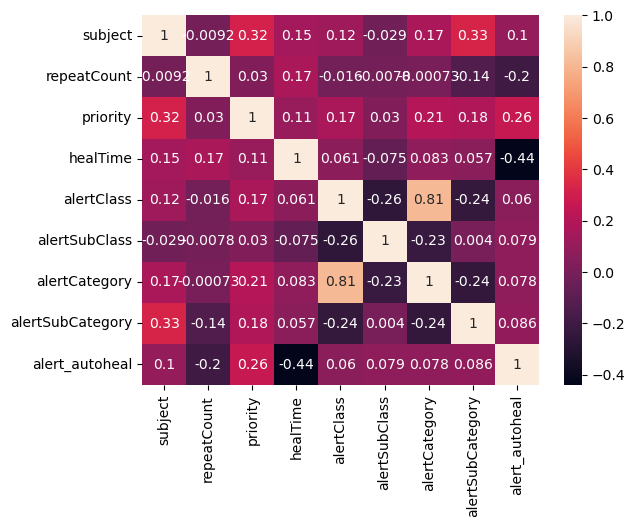

In [73]:
sns.heatmap(smote.corr(), annot=True)

In [74]:
get_correlation('alertClass','alertCategory', smote)

Correlation b/w alertClass and alertCategory is 0.8104647734273087
P-value of this correlation is 0.0


In [75]:
get_correlation('healTime','alertCategory', X_smote)

Correlation b/w healTime and alertCategory is 0.08277937073097688
P-value of this correlation is 5.493052414448813e-14


OLS

In [76]:
import statsmodels.api as sm

In [77]:
X_smote_cont = sm.add_constant(smote)
X_smote_cont.head()

,const,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,1.0,836.0,2.0,3.0,60.0,6.0,20.0,5.0,2.0,1
1,1.0,376.0,2.0,0.0,60.0,6.0,4.0,5.0,18.0,1
2,1.0,376.0,2.0,0.0,180.0,3.0,17.0,5.0,18.0,1
3,1.0,1987.0,2.0,1.0,240.0,6.0,15.0,2.0,38.0,1
4,1.0,376.0,2.0,0.0,59.0,3.0,9.0,5.0,18.0,1


In [78]:
X_smote_cont.shape

(8226, 10)

In [79]:
X_ols = X_smote_cont.drop(["healTime"],axis=1)
y_ols = X_smote_cont["healTime"]

In [80]:
X_ols.head()

,const,subject,repeatCount,priority,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,1.0,836.0,2.0,3.0,6.0,20.0,5.0,2.0,1
1,1.0,376.0,2.0,0.0,6.0,4.0,5.0,18.0,1
2,1.0,376.0,2.0,0.0,3.0,17.0,5.0,18.0,1
3,1.0,1987.0,2.0,1.0,6.0,15.0,2.0,38.0,1
4,1.0,376.0,2.0,0.0,3.0,9.0,5.0,18.0,1


In [81]:
y_ols.head()

0     60.0
1     60.0
2    180.0
3    240.0
4     59.0
Name: healTime, dtype: float64

In [82]:
model= sm.OLS(y_ols, X_ols).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               healTime   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.275
Method:                 Least Squares   F-statistic:                     390.1
Date:                Wed, 05 Apr 2023   Prob (F-statistic):               0.00
Time:                        12:10:13   Log-Likelihood:                -86876.
No. Observations:                8226   AIC:                         1.738e+05
Df Residuals:                    8217   BIC:                         1.738e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             1668.9668    650.498      2.566      0.010     393.826    2944.107
subject              1.1857      0.117     10.114      0.000       0.956       1.416
repeatCount       1093.3070    140.855      7.762      0.000     817.195    1369.419
priority          2319.7900    140.182     16.548      0.000    2044.998    2594.582
alertClass         -50.9416     78.750     -0.647      0.518    -205.312     103.428
alertSubClass      -52.7676     25.269     -2.088      0.037    -102.301      -3.234
alertCategory      409.9116     78.280      5.236      0.000     256.463     563.360
alertSubCategory    41.4191      7.315      5.662      0.000      27.080      55.758
alert_autoheal   -1.079e+04    219.679    -49.129      0.000   -1.12e+04   -1.04e+04
==============================================================================
Omnibus:                     5128.190   Durbin-Watson:                   1.769
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            51758.086
Skew:                           2.926   Prob(JB):                         0.00
Kurtosis:                      13.806   Cond. No.                     1.19e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.19e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

```Variance Inflation Factor (VIF) is a metric used to detect the presence of multicollinearity in regression models. High VIF values indicate that there is a high degree of correlation between predictor variables, which can lead to unstable and unreliable coefficient estimates in the regression model.```

In [83]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [84]:
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [85]:
smote

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.000000,2.000000,3.000000,60.000000,6.000000,20.000000,5.000000,2.000000,1
1,376.000000,2.000000,0.000000,60.000000,6.000000,4.000000,5.000000,18.000000,1
2,376.000000,2.000000,0.000000,180.000000,3.000000,17.000000,5.000000,18.000000,1
3,1987.000000,2.000000,1.000000,240.000000,6.000000,15.000000,2.000000,38.000000,1
4,376.000000,2.000000,0.000000,59.000000,3.000000,9.000000,5.000000,18.000000,1
...,...,...,...,...,...,...,...,...,...
8221,1569.000000,2.000000,0.000000,1448.064958,3.000000,9.000000,2.000000,40.000000,0
8222,259.895877,2.000000,0.598475,4427.725475,4.204575,7.393899,3.803050,14.409151,0
8223,2037.437060,2.000000,1.000000,12600.000000,0.000000,16.000000,0.000000,59.000000,0
8224,2728.496983,2.319428,1.000000,2361.668678,5.041717,13.083434,3.638855,45.542320,0


In [86]:
smote.iloc[:,:-1]

,subject,repeatCount,priority,healTime,alertClass,alertSubClass,alertCategory,alertSubCategory
0,836.000000,2.000000,3.000000,60.000000,6.000000,20.000000,5.000000,2.000000
1,376.000000,2.000000,0.000000,60.000000,6.000000,4.000000,5.000000,18.000000
2,376.000000,2.000000,0.000000,180.000000,3.000000,17.000000,5.000000,18.000000
3,1987.000000,2.000000,1.000000,240.000000,6.000000,15.000000,2.000000,38.000000
4,376.000000,2.000000,0.000000,59.000000,3.000000,9.000000,5.000000,18.000000
...,...,...,...,...,...,...,...,...
8221,1569.000000,2.000000,0.000000,1448.064958,3.000000,9.000000,2.000000,40.000000
8222,259.895877,2.000000,0.598475,4427.725475,4.204575,7.393899,3.803050,14.409151
8223,2037.437060,2.000000,1.000000,12600.000000,0.000000,16.000000,0.000000,59.000000
8224,2728.496983,2.319428,1.000000,2361.668678,5.041717,13.083434,3.638855,45.542320


In [87]:
df_vif = smote
calc_vif(df_vif)

,variables,VIF
0,subject,4.533310
1,repeatCount,7.262601
2,priority,3.688663
3,healTime,1.727646
4,alertClass,14.825892
5,alertSubClass,6.331722
6,alertCategory,13.095392
7,alertSubCategory,5.479562
8,alert_autoheal,2.876392


### Finaly we have taken decision to remove ```alertClass``` column

In [186]:
df_reg = smote.drop(['alertClass'],axis=1)
calc_vif(df_reg)

,variables,VIF
0,subject,4.533050
1,repeatCount,7.023955
2,priority,3.688433
3,healTime,1.727641
4,alertSubClass,6.321457
5,alertCategory,4.120555
6,alertSubCategory,5.446681
7,alert_autoheal,2.870098


In [187]:
df_reg

,subject,repeatCount,priority,healTime,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.000000,2.000000,3.000000,60.000000,20.000000,5.000000,2.000000,1
1,376.000000,2.000000,0.000000,60.000000,4.000000,5.000000,18.000000,1
2,376.000000,2.000000,0.000000,180.000000,17.000000,5.000000,18.000000,1
3,1987.000000,2.000000,1.000000,240.000000,15.000000,2.000000,38.000000,1
4,376.000000,2.000000,0.000000,59.000000,9.000000,5.000000,18.000000,1
...,...,...,...,...,...,...,...,...
8221,1569.000000,2.000000,0.000000,1448.064958,9.000000,2.000000,40.000000,0
8222,259.895877,2.000000,0.598475,4427.725475,7.393899,3.803050,14.409151,0
8223,2037.437060,2.000000,1.000000,12600.000000,16.000000,0.000000,59.000000,0
8224,2728.496983,2.319428,1.000000,2361.668678,13.083434,3.638855,45.542320,0


In [188]:
X_final_df = df_reg.drop(['healTime'], axis=1)
y_final_df = df_reg['healTime']

In [189]:
X_final_df.ndim

2

In [190]:
y_final_df.ndim

1

In [191]:
X_final_df.shape, y_final_df.shape

((8226, 7), (8226,))

In [192]:
from sklearn.model_selection import train_test_split
X_train_f, X_test_f, y_train_f, y_test_f = train_test_split(X_final_df, y_final_df, test_size=.02, random_state=142)

In [193]:
X_train_f.shape, X_test_f.ndim

((8061, 7), 2)

In [194]:
y_train_f.shape, y_test_f.shape

((8061,), (165,))

In [195]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import HistGradientBoostingRegressor # df >=10000

In [196]:
reg_models = [AdaBoostRegressor(),
          BaggingRegressor(),
            RandomForestRegressor(),
          ExtraTreesRegressor(),
          GradientBoostingRegressor(),
          HistGradientBoostingRegressor()    
]

#### AdaBoostRegressor

In [197]:
ada = reg_models[0]
print(ada)
ada.fit(X_train_f, y_train_f)
ada.predict(X_test_f[:5])

AdaBoostRegressor()


array([ 675.8685446 ,  675.8685446 , 1235.12605042,  675.8685446 ,
        675.8685446 ])

In [198]:
ada.score(X_test_f, y_test_f)

0.17177694454438508

#### BaggingRegressor

In [199]:
bag = reg_models[1]
print(bag)
bag.fit(X_train_f, y_train_f)
bag.predict(X_test_f[:5])

BaggingRegressor()


array([ 186.,  858., 1650.,  902.,  600.])

In [200]:
bag.score(X_test_f, y_test_f)

0.9157029250425406

#### RandomForestRegressor

In [201]:
rand = reg_models[2]
print(rand)
rand.fit(X_train_f, y_train_f)
rand.predict(X_test_f[:5])

RandomForestRegressor()


array([ 217.2       ,  852.        , 1646.4       ,  713.68571429,
        584.3       ])

In [202]:
rand.score(X_test_f, y_test_f)

0.9182662221607736

#### ExtraTreesRegressor

In [203]:
ETR = reg_models[3]
print(ETR)
ETR.fit(X_train_f, y_train_f)
ETR.predict(X_test_f[:5])

ExtraTreesRegressor()


array([ 192. ,  870.6, 1748.4,  700. ,  765. ])

In [204]:
ETR.score(X_test_f, y_test_f)

0.8907975904227818

#### GradientBoostingRegressor

In [205]:
GBR = reg_models[4]
print(GBR)
GBR.fit(X_train_f, y_train_f)
GBR.predict(X_test_f[:5])

GradientBoostingRegressor()


array([ 716.39802741,  668.82509657, 4816.71371592, 1084.69692661,
        855.89013046])

In [206]:
GBR.score(X_test_f, y_test_f)

0.8047197455894776

#### HistGradientBoostingRegressor

In [207]:
HGBR = reg_models[5]
print(HGBR)
HGBR.fit(X_train_f, y_train_f)
HGBR.predict(X_test_f[:5])

HistGradientBoostingRegressor()


array([586.94724529, 746.34993727, 824.85380508, 711.22024306,
       800.2602948 ])

In [208]:
HGBR.score(X_test_f, y_test_f)

0.8992515323285937

In [209]:
X_test_f[:5]

,subject,repeatCount,priority,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
9,432.0,2.0,2.0,15.0,5.0,18.0,1
1575,2706.0,2.0,1.0,10.0,7.0,42.0,1
1695,1096.0,3.0,1.0,10.0,7.0,42.0,1
220,1202.0,2.0,1.0,17.0,3.0,35.0,1
4666,2916.0,2.0,2.0,10.0,7.0,42.0,1


In [210]:
y_test_f[:5]

/tmp/ipykernel_398637/2195888454.py:1: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_test_f[:5]


9        180.0
1575     900.0
1695    1500.0
220      900.0
4666    3000.0
Name: healTime, dtype: float64

In [211]:
### I need to seek for homoscadiacity and hetrogenecity

In [212]:
import statsmodels.stats.api as sms
import statsmodels.formula.api as smf
from statsmodels.compat import lzip # to encode and decode Lzip archives 

In [213]:
# mod = smf.quantreg('healTime ~ subject+subject+priority+alertSubClass+alertCategory+alertSubCategory+alert_autoheal', df_reg)
# res = mod.fit(q=0.5)
# print(res.summary())

In [214]:
mod = smf.quantreg('healTime ~ subject+repeatCount+priority+alertSubClass+alertCategory+alertSubCategory+alert_autoheal', df_reg)
res = mod.fit(q=0.5)
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:               healTime   Pseudo R-squared:               0.2089
Model:                       QuantReg   Bandwidth:                       321.1
Method:                 Least Squares   Sparsity:                        2781.
Date:                Wed, 05 Apr 2023   No. Observations:                 8226
Time:                        12:26:08   Df Residuals:                     8218
                                        Df Model:                            7
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept         4501.2167     91.914     48.972      0.000    4321.043    4681.391
subject              0.0568      0.017      3.254      0.001       0.023       0.091
repeatCount         88.8892     20.937      4.246      0.000      47.847     129.931
priority           289

In [217]:
# Fit the regression model
fit = smf.ols('healTime ~ subject+repeatCount+priority+alertSubClass+alertCategory+alertSubCategory+alert_autoheal', df_reg).fit()

In [218]:
print(fit.summary2())

                       Results: Ordinary least squares
Model:                 OLS                 Adj. R-squared:        0.275      
Dependent Variable:    healTime            AIC:                   173767.5804
Date:                  2023-04-05 12:26    BIC:                   173823.7009
No. Observations:      8226                Log-Likelihood:        -86876.    
Df Model:              7                   F-statistic:           445.8      
Df Residuals:          8218                Prob (F-statistic):    0.00       
R-squared:             0.275               Scale:                 8.7342e+07 
-----------------------------------------------------------------------------
                    Coef.    Std.Err.    t     P>|t|     [0.025      0.975]  
-----------------------------------------------------------------------------
Intercept          1537.2173 617.7696   2.4883 0.0129    326.2329   2748.2018
subject               1.1853   0.1172  10.1113 0.0000      0.9555      1.4151
repeatCou

#### # Conduct the Breusch-Pagan test

There are several ways to detect heteroskedasticity in regression, such as visual inspection of residual plots, the Breusch-Pagan test, and the White test. Once heteroskedasticity is detected, there are various methods to address it, such as weighted least squares regression, robust standard errors, and transforming the dependent variable or the independent variables.

In [219]:
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
 
# Get the test result
test_result = sms.het_breuschpagan(fit.resid, fit.model.exog)
 
lzip(names, test_result)

[('Lagrange multiplier statistic', 1220.5101620107862),
 ('p-value', 2.5915998347502614e-259),
 ('f-value', 204.53657964507764),
 ('f p-value', 6.911343184746678e-281)]

Output Interpretation:

Here, the Lagrange multiplier statistic for the test comes out to be equal to 4.364 and the corresponding p-value comes out to be equal to 0.224. Since the p-value is greater than 0.05 so we couldn’t reject the null hypothesis. Hence, We do not have enough proof to say that heteroscedasticity is present in the regression model.

How to fix Heteroscedasticity:
In the above example, heteroscedasticity was absent in the regression model. But for the case when heteroscedasticity actually exists then there are three ways to fix this:

Transform the dependent variable: We can alter the dependent variable using some technique. For example, we can take the log of the dependent variable.
Redefine the dependent variable:  We can redefine the dependent variable. For example, using a rate for the dependent variable than the flawed value.
Use weighted regression: The last way is to use weighted regression. In this type of regression, the weight is assigned to each data point on the basis of the variance of its fitted value. Using proper weights can eliminate the problem of heteroscedasticity.

In [220]:
#pip install lightgbm

In [221]:
from lightgbm import LGBMRegressor # light gradient-boosting machine regressor

In [222]:
df_reg

,subject,repeatCount,priority,healTime,alertSubClass,alertCategory,alertSubCategory,alert_autoheal
0,836.000000,2.000000,3.000000,60.000000,20.000000,5.000000,2.000000,1
1,376.000000,2.000000,0.000000,60.000000,4.000000,5.000000,18.000000,1
2,376.000000,2.000000,0.000000,180.000000,17.000000,5.000000,18.000000,1
3,1987.000000,2.000000,1.000000,240.000000,15.000000,2.000000,38.000000,1
4,376.000000,2.000000,0.000000,59.000000,9.000000,5.000000,18.000000,1
...,...,...,...,...,...,...,...,...
8221,1569.000000,2.000000,0.000000,1448.064958,9.000000,2.000000,40.000000,0
8222,259.895877,2.000000,0.598475,4427.725475,7.393899,3.803050,14.409151,0
8223,2037.437060,2.000000,1.000000,12600.000000,16.000000,0.000000,59.000000,0
8224,2728.496983,2.319428,1.000000,2361.668678,13.083434,3.638855,45.542320,0


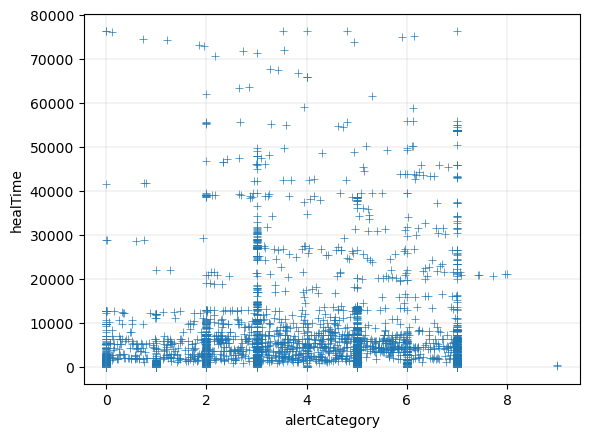

In [223]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data=df_reg, x="alertCategory", y="healTime", marker='+')
plt.grid(linestyle='-', linewidth=0.2)

In [224]:
#sns.pairplot(data=df_reg, hue='healTime', kind='reg')

In [225]:
acc=[]
regressor = {}
for tau in [0.1, 0.5, 0.9]:
    reg = LGBMRegressor(objective='quantile', alpha=tau)
    reg.fit(X_train_f, y_train_f)
    pred = reg.predict(X_test_f)
    acc.append(reg.score(X_test_f, y_test_f))
    preds = pd.DataFrame(pred, columns = [str(tau)])
    regressor[str(tau)] = {'reg': reg, 'predictions': preds, 'Accuracy':acc}

In [226]:
reg.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': -1,
 'num_leaves': 31,
 'objective': 'quantile',
 'random_state': None,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'silent': 'warn',
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0,
 'alpha': 0.9}

In [227]:
len(pred)

165

In [228]:
print(regressor['0.1']['Accuracy'])
print(regressor['0.5']['Accuracy'])
print(regressor['0.9']['Accuracy'])

[0.6704167576833397, 0.8643409600563582, 0.6003284092223101]
[0.6704167576833397, 0.8643409600563582, 0.6003284092223101]
[0.6704167576833397, 0.8643409600563582, 0.6003284092223101]


In [229]:
data = pd.DataFrame({'0.1': regressor['0.1']['predictions']['0.1'],
              '0.5': regressor['0.5']['predictions']['0.5'],
              '0.9': regressor['0.9']['predictions']['0.9'],
              'healTime': y_test_f.reset_index()['healTime']})

In [230]:
data

,0.1,0.5,0.9,healTime
0,74.226341,368.219466,1193.163122,180.0
1,655.025683,899.998658,944.171716,900.0
2,233.899521,1240.216499,1705.270210,1500.0
3,244.733892,618.911113,1056.682539,900.0
4,218.613770,656.121861,2030.827724,3000.0
...,...,...,...,...
160,1333.047620,1553.215967,7262.912354,1500.0
161,45.369538,371.446280,1165.076746,120.0
162,418.185341,683.825519,1623.597588,300.0
163,316.110878,921.724887,2789.702031,2700.0


In [231]:
melted_data = pd.melt(data, id_vars=['healTime'])
melted_data

,healTime,variable,value
0,180.0,0.1,74.226341
1,900.0,0.1,655.025683
2,1500.0,0.1,233.899521
3,900.0,0.1,244.733892
4,3000.0,0.1,218.613770
...,...,...,...
490,1500.0,0.9,7262.912354
491,120.0,0.9,1165.076746
492,300.0,0.9,1623.597588
493,2700.0,0.9,2789.702031


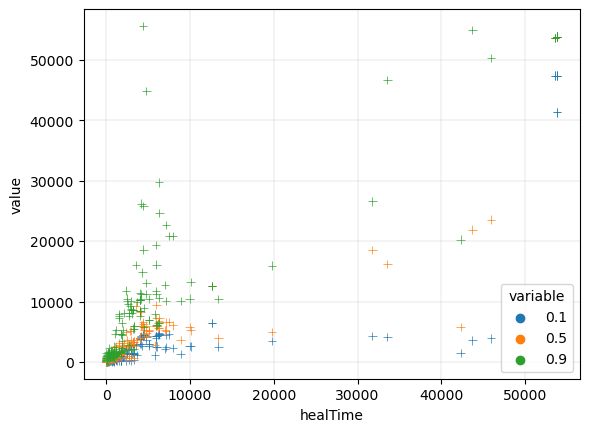

In [232]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data=melted_data, 
                x='healTime',
                y='value',
                hue='variable',
                hue_order=['0.1', '0.5', '0.9'],
                marker='+')
plt.grid(linestyle='-', linewidth=0.2)

In [233]:
from sklearn.metrics import mean_squared_error, r2_score

mean_squared_error(y_test_f, data['0.9'])

59444841.773834065

In [234]:
r2_score(y_test_f, data['0.5'])

0.8643409600563582

### Check for Homoscedasticity and Heteroscedasticity with Residuals

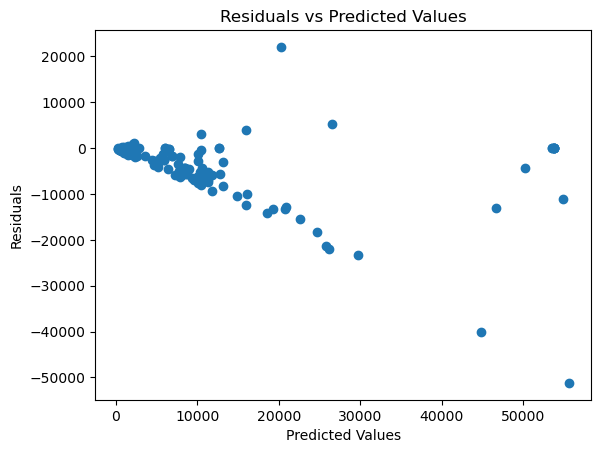

In [236]:
y_pred = reg.predict(X_test_f)

# Calculate the residuals
residuals =  y_test_f - y_pred

# Plot the residuals against the predicted values
plt.scatter(y_pred, residuals)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [256]:
log_y = np.log(y_final_df)
log_y.head()

0    4.094345
1    4.094345
2    5.192957
3    5.480639
4    4.077537
Name: healTime, dtype: float64

<AxesSubplot:ylabel='healTime'>

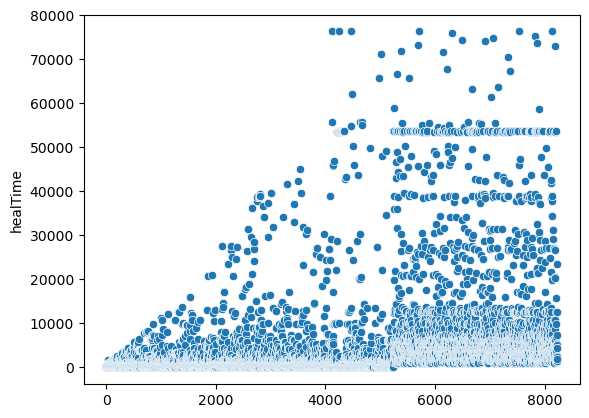

In [274]:
sns.scatterplot(y_final_df) # befor

<AxesSubplot:ylabel='healTime'>

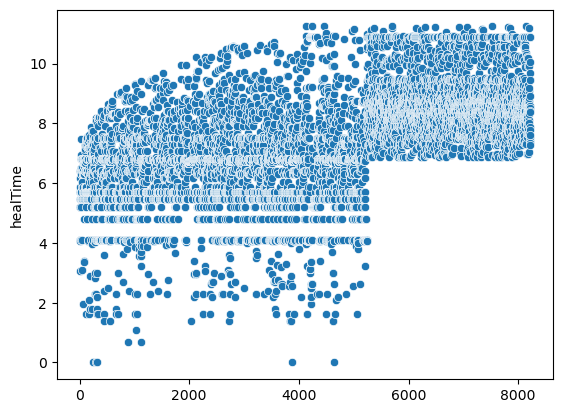

In [273]:
sns.scatterplot(log_y) # after

In [257]:
X_train_log, X_test_log, y_train_log, y_test_log = train_test_split(X_final_df, log_y, test_size=.02, random_state=142)

In [269]:
acc1=[]
regressor1 = {}
for tau in [0.1, 0.5, 0.9]:
    reg1 = LGBMRegressor(objective='quantile', alpha=tau)
    reg1.fit(X_train_log, y_train_log)
    pred1 = reg1.predict(X_test_log)
    acc1.append(reg1.score(X_test_log, y_test_log))
    preds1 = pd.DataFrame(pred1, columns = [str(tau)])
    regressor1[str(tau)] = {'reg': reg1, 'predictions': preds1, 'Accuracy':acc1}

In [270]:
print(regressor1['0.1']['Accuracy'])
print(regressor1['0.5']['Accuracy'])
print(regressor1['0.9']['Accuracy'])

[0.6272860869635213, 0.784024404036076, 0.485779280415491]
[0.6272860869635213, 0.784024404036076, 0.485779280415491]
[0.6272860869635213, 0.784024404036076, 0.485779280415491]


In [275]:
data1 = pd.DataFrame({'0.1': regressor1['0.1']['predictions']['0.1'],
              '0.5': regressor1['0.5']['predictions']['0.5'],
              '0.9': regressor1['0.9']['predictions']['0.9'],
              'healTime': y_test_log.reset_index()['healTime']})

In [276]:
data1

,0.1,0.5,0.9,healTime
0,4.315354,5.947104,7.074750,5.192957
1,6.347191,6.802386,6.984525,6.802395
2,5.570801,7.089585,7.445618,7.313220
3,5.502635,6.580428,7.121575,6.802395
4,5.398187,6.396745,7.310478,8.006368
...,...,...,...,...
160,7.077901,7.383572,8.688719,7.313220
161,4.043193,5.792653,6.704844,4.787492
162,5.670303,6.632642,7.183445,5.703782
163,5.709849,6.812926,7.903118,7.901007


In [277]:
melted_data1 = pd.melt(data, id_vars=['healTime'])
melted_data1

,healTime,variable,value
0,180.0,0.1,4.315354
1,900.0,0.1,6.347191
2,1500.0,0.1,5.570801
3,900.0,0.1,5.502635
4,3000.0,0.1,5.398187
...,...,...,...
490,1500.0,0.9,8.688719
491,120.0,0.9,6.704844
492,300.0,0.9,7.183445
493,2700.0,0.9,7.903118


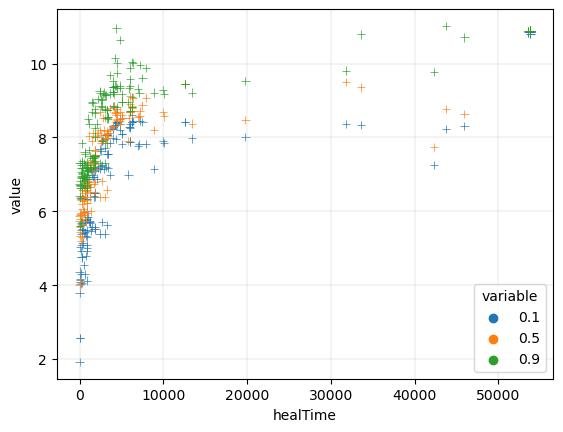

In [278]:
plt.rcParams.update({'font.size': 10, 'figure.dpi':100})
sns.scatterplot(data=melted_data1, 
                x='healTime',
                y='value',
                hue='variable',
                hue_order=['0.1', '0.5', '0.9'],
                marker='+')
plt.grid(linestyle='-', linewidth=0.2)

In [279]:
mean_squared_error(y_test_log, data1['0.9'])

1.4821457016789368

In [283]:
r2_score(y_test_log, data['0.5'])

0.784024404036076

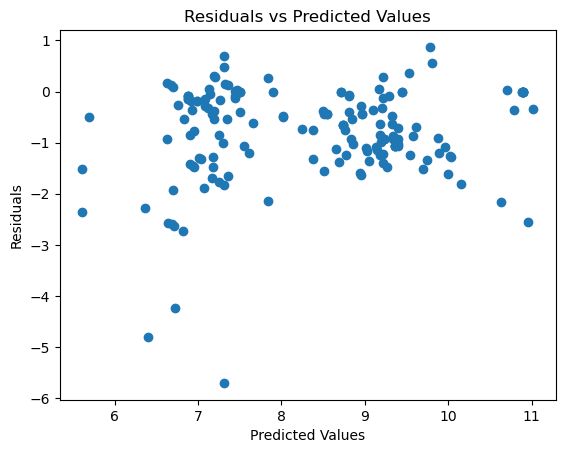

In [285]:
y_pred1 = reg.predict(X_test_log)

# Calculate the residuals
residuals1 =  y_test_log - y_pred1

# Plot the residuals against the predicted values
plt.scatter(y_pred1, residuals1)
plt.title('Residuals vs Predicted Values')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.show()

In [287]:
from sklearn.metrics import r2_score, mean_squared_error
import math

# Calculate R-squared
r2 = r2_score(y_test_log, y_pred1)

# Calculate adjusted R-squared
n = len(y_test_log)
p = X.shape[1]
adj_r2 = 1 - ((1 - r2) * (n - 1) / (n - p - 1))

# Calculate RMSE
rmse = math.sqrt(mean_squared_error(y_test_log, y_pred1))

# Print the results
print("R-squared: {:.3f}".format(r2))
print("Adjusted R-squared: {:.3f}".format(adj_r2))
print("RMSE: {:.3f}".format(rmse))


R-squared: 0.486
Adjusted R-squared: 0.459
RMSE: 1.217


In [ ]:
wait

trying with other methods

In [129]:
from sklearn.linear_model import QuantileRegressor

In [130]:
y_true_mean = y_test_f.mean()

In [ ]:
quantiles = [0.05, 0.5, 0.95]
predictions = {}
out_bounds_predictions = np.zeros_like(y_true_mean, dtype=np.bool_)
for quantile in quantiles:
    qr = QuantileRegressor(quantile=quantile, alpha=0)
    y_pred = qr.fit(X_train_f, y_train_f).predict(X_test_f)
    predictions[quantile] = y_pred

    if quantile == min(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred >= y_normal
        )
    elif quantile == max(quantiles):
        out_bounds_predictions = np.logical_or(
            out_bounds_predictions, y_pred <= y_normal
        )

In [ ]:
predictions

In [ ]:
from sklearn.neural_network import MLPRegressor

In [ ]:
regr = MLPRegressor(random_state=142, max_iter=10000).fit(X_train_f, y_train_f)

In [ ]:
regr.predict(X_test_f[:5])

In [ ]:
regr.score(X_test_f, y_test_f)